# Define the path to the source code and import the package

In [23]:
import sys
path_to_package = 'C:/Users/Bart/bactoscoop'
sys.path.append(path_to_package + '/src/')
# Get the parent directory of the current script
import bactoscoop
import bactoscoop.plot as bplt

# Folder Structure

The structure of your `example_data` folder should look like this:

example_data  
├── masks  
│   ├── image_name_XY0_C1_cp_masks.tif  
│   ├── ...  
├── image_name_XY0_C1.tif  
├── image_name_XY1_C1.tif  
├── image_name_XY2_C1.tif  
├── ...  

In [25]:
### Loading images and initializing ImageCollection object ---------------------------------------------------------------------------
name= "/example_data"

# The path to our example data happens to be in the same directory as the script, but you can specify any path you like
folder_path =  path_to_package + name

# The channel you specify will be the part the algorithm looks for right before .tif (i.e. c1.tif if channel1 = 'c1')
channel1 = 'C1'
ic = bactoscoop.ImageCollection(folder_path)

In [26]:
# Segmentation of channel1 images. If you have masks you can also skip this step. The masks should be in a folder called 'masks' one level down and have the same name as the images.

ic.load_phase_images(phase_channel=channel1)
n = len(ic.images)
ic.segment_images(n = range(n), 
                  minsize = 100, # minimum size of masks in pixels
                  mask_thresh = 1) # Increasing this parameter will make the mask smaller, decreasing bigger


2024-09-11 11:36:00,815 [INFO] Only one TIFF file found in folder: C:/Users/Bart/bactoscoop/example_data
2024-09-11 11:36:00,819 [INFO] ** TORCH GPU version installed and working. **
>>> GPU activated? True
2024-09-11 11:36:00,825 [INFO] >>bact_phase_omni<< model set to be used
2024-09-11 11:36:00,830 [INFO] ** TORCH GPU version installed and working. **
2024-09-11 11:36:00,833 [INFO] >>>> using GPU


2024-09-11 11:36:14,889 [INFO] Only one TIFF file found in folder: C:/Users/Bart/bactoscoop/example_data/masks
2024-09-11 11:36:14,912 [INFO] Only one TIFF file found in folder: C:/Users/Bart/bactoscoop/example_data


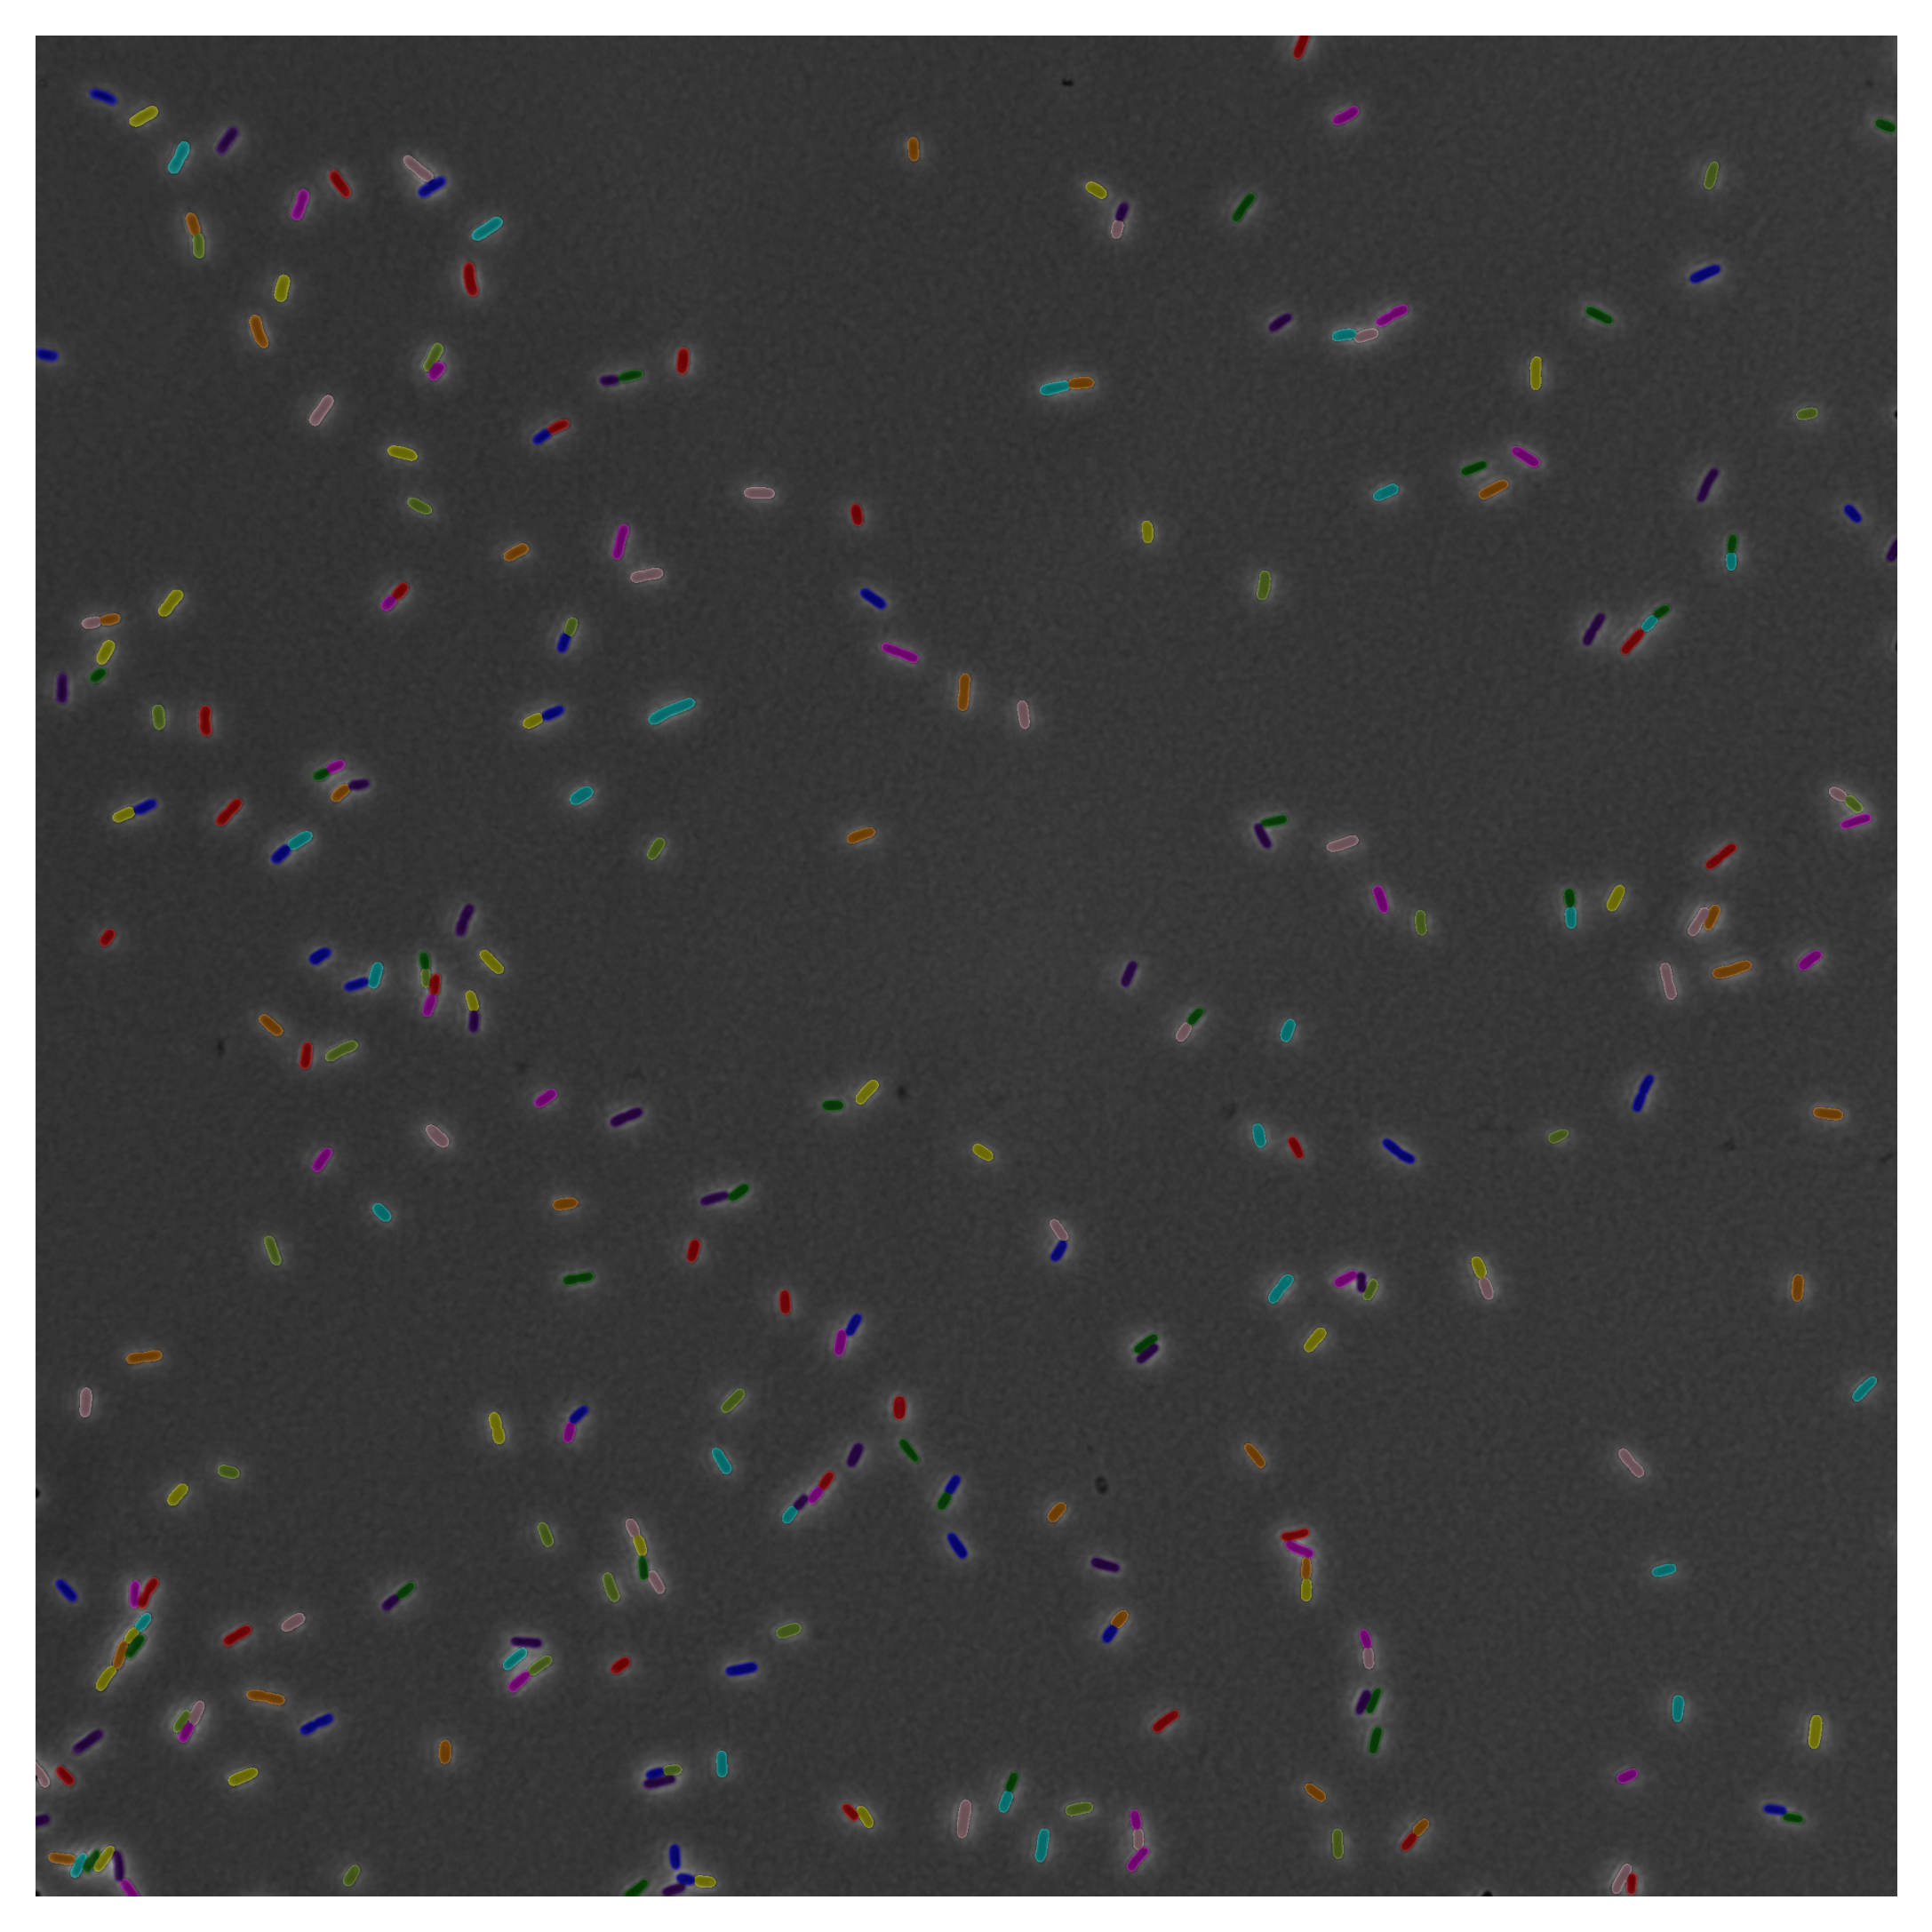

In [27]:
#Check segmentation
ic.create_image_objects(phase_channel=channel1)
bplt.plot_mask(ic.image_objects[0], joined=False, alpha=0.4) # Visualize the masks

In [29]:
# Process masks into meshes...
ic.batch_process_mesh(object_list = None, # 'None' will process the entire folder. ic.image_objects[0] will process only the first.
                      phase_channel = channel1,
                      join_thresh = 4, # join threshold in pixel
                      split_thresh = 0.5, # reduce the value if cells do not split when they should
                      CD_width=False, # False = constriction degree measurement based on signal*width -> True = CD measurement based on width alone
                      smoothing = 0.1,
                      save_data = True) # Save the data to a .pkl file.




2024-09-11 11:39:38,120 [INFO] PROCESSING IMAGE: TL14_SGL711_M9glu_12H_XY0_C1.tiff
2024-09-11 11:39:38,122 [INFO] >>> Joining cells ...


100%|██████████| 275/275 [00:10<00:00, 25.06it/s]


2024-09-11 11:40:02,267 [INFO] >>> Creating meshes from joined masks ...


100%|██████████| 232/232 [00:11<00:00, 20.35it/s]


2024-09-11 11:40:14,480 [INFO] >>> Splitting cells ...


100%|██████████| 232/232 [00:00<00:00, 264.70it/s]

Cell objects are created from processed meshes. 240 Cell objects are created.


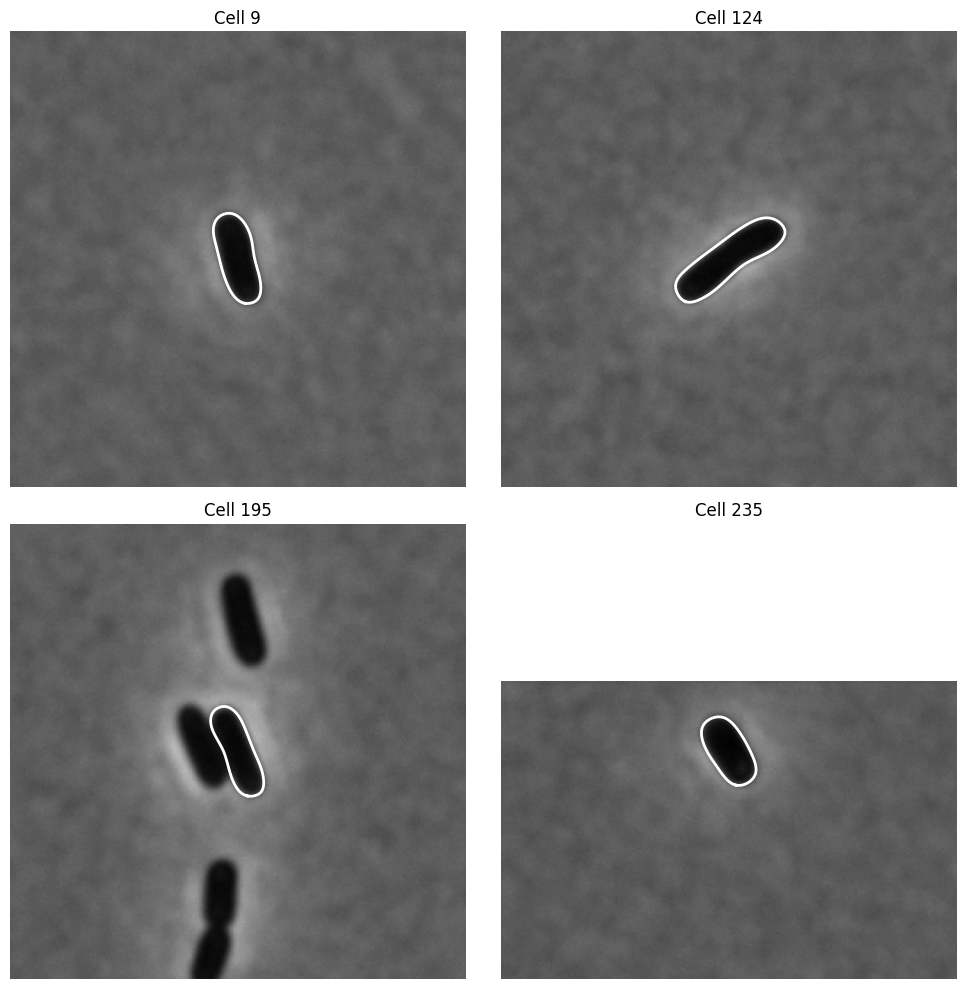

Amount of cells after mesh construction: 240


In [22]:
bplt.plot_random_contours(ic.image_objects[0], crop_size =200)
print(f'Amount of cells after mesh construction: {len(ic.mesh_df_collection)}' )

In [ ]:
# Check all cells
plot = [bplt.plot_contour(cell.cell_id, image) for image in ic.image_objects for cell in image.cells]
